In [149]:
import cv2
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime
import os
import glob
import imutils

In [151]:
# resized = imutils.resize(image, width=100)

In [2]:
imageName=r"/home/facit/Downloads/Padded-Image-Resizer-master/Input/image (38).jpg"

In [152]:
imageToPredict = cv2.imread(imageName)

In [153]:
designer_width = 480
designer_height = 272
designer_ratio = designer_width / designer_height

In [154]:
designer_ratio

1.7647058823529411

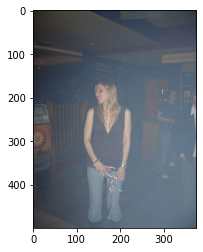

In [155]:
original_width =imageToPredict.shape[::-1][1]
original_height =imageToPredict.shape[::-1][2]
original_ratio = original_width / original_height
plt.imshow(imageToPredict[:,:,::-1])

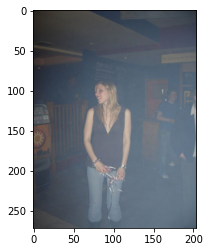

In [96]:
resized = imutils.resize(imageToPredict, height=272)
plt.imshow(resized[:,:,::-1])

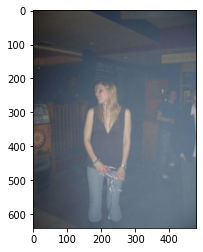

In [98]:
resized = imutils.resize(resized, width=480)
plt.imshow(resized[:,:,::-1])

In [101]:
resized.shape

(640, 480, 3)

In [102]:
aspect = width / float(height)

NameError: name 'width' is not defined

In [128]:
# width =image.shape[::-1][1]
# height =imageToPredict.shape[::-1][2]
width  = image.size[0]
height = image.size[1]


aspect = width / float(height)

ideal_width = 480
ideal_height = 272
ideal_aspect= ideal_width / float(ideal_height)

In [111]:
from PIL import Image

In [115]:
image  = Image.open(r"/home/facit/Downloads/Padded-Image-Resizer-master/Input/image (38).jpg")

In [129]:
if aspect > ideal_aspect:
    # Then crop the left and right edges:
    new_width = int(ideal_aspect * height)
    offset = (width - new_width) / 2
    resize = (offset, 0, width - offset, height)
else:
    # ... crop the top and bottom:
    new_height = int(width / ideal_aspect)
    offset = (height - new_height) / 2
    resize = (0, offset, width, height - offset)

In [144]:
(ideal_width+offset)/(new_height + offset)

0.8059006211180124

In [ ]:
ideal_width, ideal_height

In [141]:
# h,w=image.shape[0:2]
w  = image.size[0]
h = image.size[1]

base_size=h+20,w+20,3
# make a 3 channel image for base which is slightly larger than target img
base=np.zeros(base_size,dtype=np.uint8)
cv2.rectangle(base,(0,0),(w+20,h+20),(255,255,255),30) # really thick white rectangle
base[10:h+10,10:w+10]=image # this works

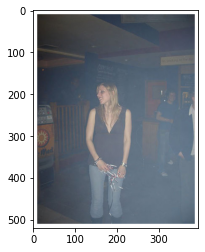

In [156]:
plt.imshow(base)

In [ ]:
def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w: return cv2.resize(img, (size, size), interpolation)
        if h > w: dif = h
        else:     dif = w
      x_pos = int((dif - w)/2.)
      y_pos = int((dif - h)/2.)
      if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
      else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
      return cv2.resize(mask, (size, size), interpolation)

In [126]:
new_height

212

In [127]:
new_width

NameError: name 'new_width' is not defined

In [121]:
# thumb = imageToPredict.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
# thumb.save('thumb.jpg')

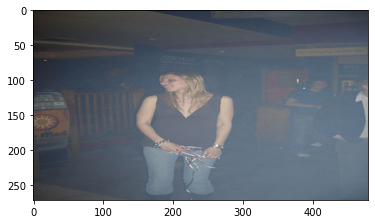

In [123]:
plt.imshow(thumb)

In [92]:
# resized

In [91]:
plt.imshow(resized)

NameError: name 'image' is not defined

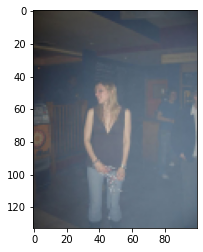

In [30]:
original_ratio

0.75

In [10]:
original_ratio

1.7647058823529411

In [38]:
designer_ratio

1.7647058823529411

In [60]:
xpad = 30 -original_width

In [63]:
ypad = 17 - original_height

In [66]:
abs(ypad)

483

In [68]:
original_height + abs(ypad)

983

In [69]:
original_width + abs(xpad)

720

In [70]:
720/720

1.3652777777777778

In [37]:
if original_ratio == designer_ratio:
    img = cv2.resize(imageToPredict, (original_width, designer_height));
else:
    adjusted_height = designer_width * original_ratio
    adjusted_width = designer_height * original_ratio
#     designer_width = designer_width * original_ratio
#     designer_height = designer_height * original_ratio
#     adjusted_height =  * original height / original width
#     adjusted_width = <user-chosen height> * original width / original height
    print(adjusted_width/adjusted_height)


0.5666666666666667


In [50]:
adjusted_width

204.0

In [52]:
designer_height

272

In [53]:
designer_width

480

In [54]:
x = (30 * original_height - 17 * original_width) /13

In [59]:
(original_width+x) / (original_height +x)

0.8925619834710744

1038.4615384615386

In [48]:
30 * designer_height 

8160

In [49]:
17 * designer_width

8160

In [41]:
adjusted_height

360.0

In [22]:
adjusted_height = 480 * designer_height / designer_width
adjusted_width = 272 * designer_width  / designer_height

In [23]:
adjusted_width/

0.3187499999999999

In [24]:
adjusted_height/adjusted_width

3.1372549019607847

In [21]:
adjusted_width

480.0

In [ ]:
480 and 272 aspect ratio 1
image aspect ratio 2
if ratio 1 == ratio 2
   resize
else 
   multiple image size with ratio => convert to the same aspect ratio
   add padding and resize

In [147]:
import cv2
import numpy as np


In [ ]:

# read image
img = cv2.imread('lena.jpg')
ht, wd, cc= img.shape

# create new image of desired size and color (blue) for padding
ww = 300
hh = 300
color = (255,0,0)
result = np.full((hh,ww,cc), color, dtype=np.uint8)

# compute center offset
xx = (ww - wd) // 2
yy = (hh - ht) // 2

# copy img image into center of result image
result[yy:yy+ht, xx:xx+wd] = img

# view result
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save result
cv2.imwrite("lena_centered.jpg", result)

In [163]:
from PIL import Image, ImageOps

In [260]:
def resize_with_padding(img, expected_size):
    print(img.size)
    img.thumbnail((expected_size[0], expected_size[1]))
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    print(delta_width)
    print(delta_height)
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    print(pad_width)
    print(pad_height)
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    print(padding)
    return ImageOps.expand(img, padding)

In [261]:
x_ = imageToPredict.shape[1]
y_ = imageToPredict.shape[0]

In [262]:
def drawBox(boxes, image):
    print(boxes)
    for i in range(0, len(boxes)):
        cv2.rectangle(image, (boxes[i][2], boxes[i][3]), (boxes[i][4], boxes[i][5]), (255, 0, 0), 1)
    plt.imshow(image)
    plt.show()

[[1, 0, 28, 25, 447, 375]]


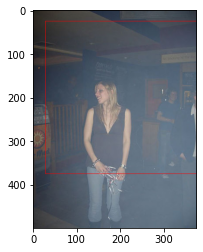

(375, 500)
276
0
138
0
(138, 0, 138, 0)


In [267]:
imageName=r"/home/facit/Downloads/Padded-Image-Resizer-master/Input/image (38).jpg"
img = Image.open(imageName)
drawBox([[1, 0, 28, 25, 447, 375]],np.array(img))

img = resize_with_padding(img, (480, 272))

[[1, 0, 28, 25, 37, 75]]


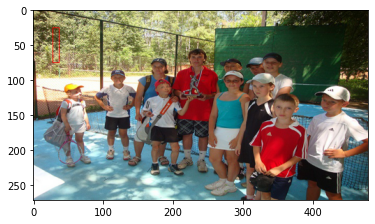

In [270]:
( 1 )
drawBox([[1, 0, 28, 25, 37, 75]],np.array(img))

(640, 362)
[[1, 0, 28, 25, 97, 175]]


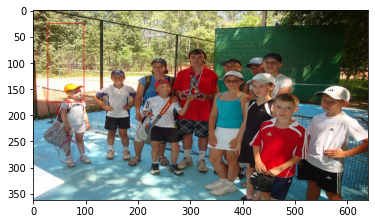

(640, 362)
0
0
0
0
(0, 0, 0, 0)
(480, 272)
[[1, 0, 28, 25, 97, 175]]


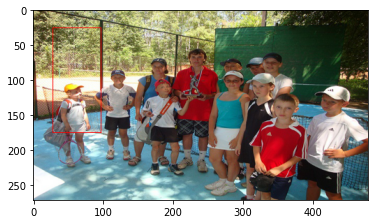

(480, 272)


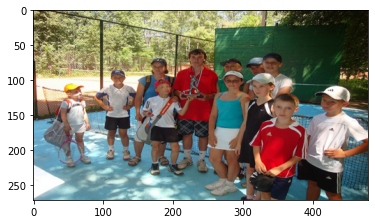

In [280]:
imageName=r"/home/facit/Desktop/image.jpg"
img = Image.open(imageName)
print(img.size)
drawBox([[1, 0, 28, 25, 97, 175]],np.array(img))
img = resize_with_padding(img, (480, 272))
print(img.size)
drawBox([[1, 0, 28, 25, 97, 175]],np.array(img))
targetSize1 = 480
targetSize2 = 272
x_scale = targetSize1 / x_

y_scale = targetSize2 / y_

print(img.size)
plt.imshow(img)

In [250]:
img.save("images.jpg")

In [188]:
img.size

(480, 272)

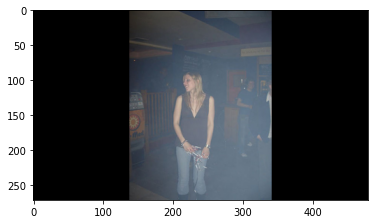

In [200]:
plt.imshow(img)

In [ ]:

if __name__ == "__main__":
    img = Image.open("./demo.jpg")
    print(img)
    img = resize_with_padding(img, (500, 400))
    print(img.size)
    img.show()
    img.save("resized_img.jpg")

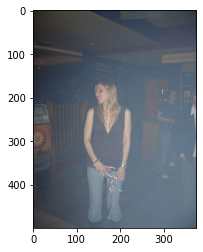

In [170]:
original_width =imageToPredict.shape[::-1][1]
original_height =imageToPredict.shape[::-1][2]
original_ratio = original_width / original_height
plt.imshow(imageToPredict[:,:,::-1])

In [235]:
original_width

375

In [236]:
original_height

500

In [237]:
ratioW = original_width / 480;
ratioH = original_height / 272;


292.96875

In [242]:
original_width

375

In [244]:
(original_height * ratioH)/(original_width * ratioW)

3.1372549019607843

919.1176470588235

In [ ]:
roi.height * ratioH

In [174]:
ratioW

0.78125

In [175]:
ratioH

1.838235294117647

In [176]:
roi.x = (roi.x * ratioW);
roi.y = roi.y * ratioH;
roi.width = roi.width * ratioW;
roi.height = roi.height * ratioH;

NameError: name 'roi' is not defined

In [208]:
import cv2
import numpy as np

# read image
img = cv2.imread(r"/home/facit/Desktop/COCO_val2014_000000001000.jpg")
ht, wd, cc= img.shape


In [213]:
# create new image of desired size and color (blue) for padding
ww = 408
hh = 272
color = (255,0,0)
result = np.full((hh,ww,cc), color, dtype=np.uint8)

# compute center offset
xx = (ww - wd) // 2
yy = (hh - ht) // 2

# copy img image into center of result image
result[yy:yy+ht, xx:xx+wd] = img

# view result
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save result
cv2.imwrite("lena_centered.jpg", result)

ValueError: could not broadcast input array from shape (480,640,3) into shape (104,116,3)

In [245]:
def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w: return cv2.resize(img, (size[0], size[1]), interpolation)
    if h > w: dif = h
    else:     dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size[0], size[1]), interpolation)

In [230]:
resized = resize2SquareKeepingAspectRation(img, size, cv2.INTER_AREA)

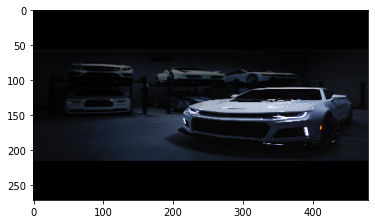

In [231]:
plt.imshow(resized[:,:,::-1])

In [232]:
cv2.imwrite("croped1.jpg",resized)

True

In [228]:
resized = resize2SquareKeepingAspectRation(img, size, cv2.INTER_AREA)

In [281]:
1024/30

34.13333333333333

In [286]:
30*34.13333333333333

1024.0

In [283]:
768/17

45.1764705882353

In [284]:
17*45

765

In [285]:
1050/765

1.3725490196078431